In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#путь к данным нужно заменить
data = pd.read_csv('D:/Numerical-methods-of-analysis/lab_1/notebooks/housing.csv', sep = ',')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
#цель y столбец 14, "иксы" с 1 по 13
k = 13
X, y = data.drop([data.columns[k]],axis = 1), data[data.columns[k]]
#конструктор признаков
poly = PolynomialFeatures(1, include_bias = False, interaction_only = True)
#делим на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 17)
X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [4]:
#скейлер сейчас "молчит"
scale = StandardScaler(with_mean = False, with_std = False)
#обучаем линейную модель (библиотечное решение)
model = LinearRegression(fit_intercept = False)
model = model.fit(X_train, y_train)
#средняя абсолютная ошибка при тестировании, коэффициент детерминации, число ненулевых
mean_absolute_error(model.predict(X_train),y_train), mean_absolute_error(model.predict(X_test),y_test)

(3.4011773501739953, 2.9569442069066283)

In [5]:
#теоретически точное решение
a = np.linalg.inv((X_train.T)@X_train)@X_train.T@y_train
mean_absolute_error(X_train@a,y_train), mean_absolute_error(X_test@a,y_test)

(3.4011773501740112, 2.9569442069066265)

# **Задание №1**
#### 1.1 Составьте в матричном виде систему линейных алгебраических уравнений для поиска коэффициентов среднеквадратического приближения g, вычислите число обусловленности матрицы. Система составляется на основе выборки train


 Система должна выглядеть как : $X\alpha = y$. Мы хотим уменьшить ошибку приближения. Ошибка вычисляется как  $$\left( \| X\alpha - y \|_2 \right)^2$$Минимум функции ошибки достигается при градиенте данной функции = 0.Взяв частные производные и составив из них СЛАУ, мы получим систему $X^T X \\alpha = X^T y$.



 Здесь $X$ - данные без столбца 'MEDV', $y$ - столбец 'MEDV', а $\\alpha$ - вектор весов модели.

Добавим столбец единиц в данные для свободного коэффициента в векторе весов

In [6]:
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])

XTX = X_train.T @ X_train
XT = X_train.T

In [7]:
X_train

array([[1.00000e+00, 7.35341e+01, 0.00000e+00, ..., 2.02000e+01,
        1.64500e+01, 2.06200e+01],
       [1.00000e+00, 2.00900e-02, 9.50000e+01, ..., 1.47000e+01,
        3.90550e+02, 2.88000e+00],
       [1.00000e+00, 5.51500e-02, 3.30000e+01, ..., 1.84000e+01,
        3.93680e+02, 6.93000e+00],
       ...,
       [1.00000e+00, 4.09740e+00, 0.00000e+00, ..., 1.47000e+01,
        3.96900e+02, 2.64200e+01],
       [1.00000e+00, 1.06120e-01, 3.00000e+01, ..., 1.66000e+01,
        3.94620e+02, 1.24000e+01],
       [1.00000e+00, 1.00840e-01, 0.00000e+00, ..., 1.78000e+01,
        3.95590e+02, 1.01600e+01]], shape=(404, 14))

In [8]:
XTX

array([[4.04000000e+02, 1.54807691e+03, 4.34900000e+03, 4.63038000e+03,
        3.00000000e+01, 2.25454800e+02, 2.54092300e+03, 2.79285000e+04,
        1.49329620e+03, 3.94400000e+03, 1.67280000e+05, 7.45510000e+03,
        1.43867990e+05, 5.16967000e+03],
       [1.54807691e+03, 3.94718664e+04, 3.56142725e+02, 2.75464650e+04,
        5.53515700e+01, 1.03342730e+03, 9.20969862e+03, 1.43285126e+05,
        2.90920954e+03, 3.48231763e+04, 9.93749509e+05, 3.08696701e+04,
        4.28084487e+05, 3.14554630e+04],
       [4.34900000e+03, 3.56142725e+02, 2.63977000e+05, 1.54319650e+04,
        2.50000000e+02, 1.88128975e+03, 2.98282965e+04, 1.50820650e+05,
        2.83844156e+04, 1.79645000e+04, 1.27858800e+06, 7.21090500e+04,
        1.69530678e+06, 2.65616800e+04],
       [4.63038000e+03, 2.75464650e+04, 1.54319650e+04, 7.21750134e+04,
        3.83740000e+02, 2.82426000e+03, 2.83317267e+04, 3.71943996e+05,
        1.30104820e+04, 5.92360500e+04, 2.25489937e+06, 8.76601770e+04,
        1.562

In [9]:
XT

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [7.35341e+01, 2.00900e-02, 5.51500e-02, ..., 4.09740e+00,
        1.06120e-01, 1.00840e-01],
       [0.00000e+00, 9.50000e+01, 3.30000e+01, ..., 0.00000e+00,
        3.00000e+01, 0.00000e+00],
       ...,
       [2.02000e+01, 1.47000e+01, 1.84000e+01, ..., 1.47000e+01,
        1.66000e+01, 1.78000e+01],
       [1.64500e+01, 3.90550e+02, 3.93680e+02, ..., 3.96900e+02,
        3.94620e+02, 3.95590e+02],
       [2.06200e+01, 2.88000e+00, 6.93000e+00, ..., 2.64200e+01,
        1.24000e+01, 1.01600e+01]], shape=(14, 404))

Число обусловленности матрицы $X^T X$

In [10]:
cond_value = np.linalg.cond(XTX)

In [11]:
cond_value

np.float64(225786332.83161607)

# **Задание №2**
#### 2.1 Найдите решение системы при помощи обратной матрицы, проверьте полученное приближение с использованием данных из обучающей и из тестовой выборки отдельно (рассчитайте метрику mean_absolute_error, сравните расчетные и исходные значения y (‘MEDV’) на графиках)

Вектор $\alpha$ находится как $\alpha = (X^T X)^{-1} X^T y$

In [12]:
try:
    alpha = np.linalg.inv(XTX) @ XT @ y_train
except:
    print('Ошибка вычисления!')

Добавили столбец с 1-ками, чтобы размеры матриц совпадали


In [13]:
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])

In [14]:
X_test

array([[1.00000e+00, 6.91100e-02, 4.50000e+01, ..., 1.52000e+01,
        3.89710e+02, 4.69000e+00],
       [1.00000e+00, 1.09600e-02, 5.50000e+01, ..., 1.53000e+01,
        3.94720e+02, 8.23000e+00],
       [1.00000e+00, 3.69311e+00, 0.00000e+00, ..., 2.02000e+01,
        3.91430e+02, 1.46500e+01],
       ...,
       [1.00000e+00, 4.33700e-02, 2.10000e+01, ..., 1.68000e+01,
        3.93970e+02, 9.43000e+00],
       [1.00000e+00, 1.35540e-01, 1.25000e+01, ..., 1.89000e+01,
        3.96900e+02, 1.30900e+01],
       [1.00000e+00, 4.59000e-02, 5.25000e+01, ..., 1.66000e+01,
        3.96900e+02, 7.60000e+00]], shape=(102, 14))

Умножим матрицы

In [15]:
alpha

array([ 3.87351529e+01, -1.06491895e-01,  5.52829604e-02,  6.69811292e-02,
        2.73609319e+00, -1.71814123e+01,  3.61872558e+00, -2.94667883e-04,
       -1.41399352e+00,  3.28245931e-01, -1.44787952e-02, -9.73914650e-01,
        7.51961641e-03, -5.62070910e-01])

In [16]:
y_train_predict = X_train @ alpha
y_test_predict = X_test @ alpha

print(f'MAE на train data: {mean_absolute_error(y_train_predict, y_train)}')
print(f'MAE на test data: {mean_absolute_error(y_test_predict, y_test)}')

MAE на train data: 3.370993112676849
MAE на test data: 3.0093478774481794


переобучение =((((((

### Нарисуем графики

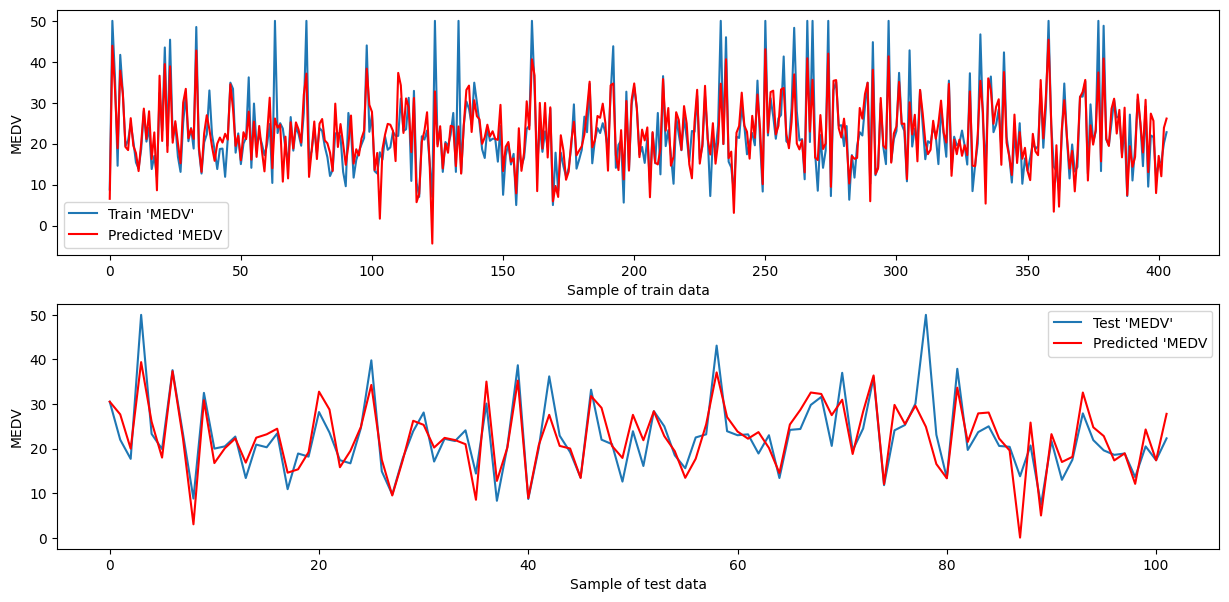

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(15,7))

ax[0].plot(np.arange(y_train.shape[0]), y_train, label="Train 'MEDV'")
ax[0].plot(np.arange(y_train.shape[0]), y_train_predict, color='r', label="Predicted 'MEDV")

ax[1].plot(np.arange(y_test.shape[0]), y_test, label="Test 'MEDV'")
ax[1].plot(np.arange(y_test.shape[0]), y_test_predict, color='r', label="Predicted 'MEDV")

ax[0].set_xlabel('Sample of train data')
ax[0].set_ylabel('MEDV')
ax[1].set_xlabel('Sample of test data')
ax[1].set_ylabel('MEDV')

ax[0].legend()
ax[1].legend()
plt.show()

### Дополняем с помощью Polynomial features степени 2 и 3


#### Степень равняется двум

In [18]:
poly2 = PolynomialFeatures(2, include_bias=False, interaction_only=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 17)
X_train, X_test = poly2.fit_transform(X_train), poly2.fit_transform(X_test)
X_train.shape, X_test.shape

((404, 104), (102, 104))

In [19]:
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])

In [20]:
cond2 = np.linalg.cond(X_train.T @ X_train)
cond2

np.float64(1.1557438392406314e+20)

Так как число обусловленности очень большое получим ошибку

In [21]:
try:
    alpha2 = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
except:
    print('Ошибка вычисления!')

Ошибка вычисления!


Используем псевдообратную матрицу

In [22]:
alpha2 = np.linalg.pinv(X_train) @ y_train

In [23]:
alpha2.shape

(105,)

In [24]:
alpha2

array([-5.88632575e+01, -3.13550802e+00,  1.68769863e-01, -4.28234677e+00,
        3.30516587e+01, -1.50331185e+01,  1.47533106e+01,  1.13619464e+00,
       -1.05065248e+01,  3.73134233e+00, -8.58007995e-02,  4.57674722e+00,
       -3.63451774e-02,  1.87378928e-01,  1.75151902e-03,  9.43414825e-02,
        1.28823386e-01,  2.77989885e+00, -3.83426388e-01,  1.39943772e-01,
       -1.82114113e-03, -1.56501666e-02, -1.61056323e-02, -3.99202767e-03,
        1.40094215e-01, -2.48907070e-04,  2.06007683e-02, -1.04778334e-03,
       -1.01996459e-02, -4.71231204e-02, -1.40882271e+00,  2.67862583e-02,
       -2.48033304e-04, -1.14460418e-02, -6.29396475e-03,  5.62557015e-04,
       -8.29976711e-03,  1.20509687e-03, -4.10293120e-04,  4.41500807e-02,
        2.66193231e-01, -9.47853766e-01,  3.32581953e-01,  5.87074445e-03,
        8.34055677e-02, -5.68858143e-02,  5.38397128e-04, -1.38311975e-02,
        4.20376778e-03, -1.55805168e-02,  3.30516587e+01, -3.31370048e+01,
       -6.73553175e+00,  

In [25]:
y_train_predict = X_train @ alpha2
y_test_predict = X_test @ alpha2

print(f'MAE на train data: {mean_absolute_error(y_train_predict, y_train)}')
print(f'MAE на test data: {mean_absolute_error(y_test_predict, y_test)}')

MAE на train data: 1.6993949118501341
MAE на test data: 2.4028700866471566


#### Степень равняется трем

In [26]:
poly3 = PolynomialFeatures(3, include_bias=False, interaction_only=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 17)
X_train, X_test = poly3.fit_transform(X_train), poly3.fit_transform(X_test)
X_train.shape, X_test.shape

((404, 559), (102, 559))

In [27]:
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])
cond2 = np.linalg.cond(X_train.T @ X_train)
cond2

np.float64(1.0277094644613381e+34)

Число обусловленности опять большое

In [28]:
try:
    alpha2 = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
except:
    print('Ошибка вычисления!')

Ошибка вычисления!


In [29]:
alpha3 = np.linalg.pinv(X_train) @ y_train

In [30]:
alpha3.shape

(560,)

In [31]:
y_train_predict = X_train @ alpha3
y_test_predict = X_test @ alpha3

print(f'MAE на train data: {mean_absolute_error(y_train_predict, y_train)}')
print(f'MAE на test data: {mean_absolute_error(y_test_predict, y_test)}')

MAE на train data: 2.0116902934223156e-07
MAE на test data: 215.6242074663593


Опять громадное, фу бяка

### Используем скейлер

In [32]:
poly3 = PolynomialFeatures(3, include_bias=False, interaction_only=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 17)
X_train, X_test = poly3.fit_transform(X_train), poly3.fit_transform(X_test)
X_train.shape, X_test.shape

((404, 559), (102, 559))

In [33]:
scale = StandardScaler(with_mean=True, with_std=True)
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [34]:
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])

In [35]:
X_train

array([[ 1.        ,  7.64992003, -0.46431012, ..., -1.55316628,
        -0.80062841,  0.61419862],
       [ 1.        , -0.41834875,  3.63323468, ..., -1.13301355,
        -0.84916132, -0.60632162],
       [ 1.        , -0.41450086,  0.95904755, ..., -0.5180932 ,
        -0.64666135, -0.56319787],
       ...,
       [ 1.        ,  0.02914191, -0.46431012, ...,  2.47331388,
         2.68980201,  1.96466278],
       [ 1.        , -0.40890683,  0.8296514 , ...,  0.31208051,
        -0.10677142, -0.34350467],
       [ 1.        , -0.40948632, -0.46431012, ..., -0.01829943,
        -0.36323012, -0.46325486]], shape=(404, 560))

In [36]:
X_test

array([[ 1.        , -0.41296873,  1.47663216, ..., -0.8685399 ,
        -0.78023481, -0.59525554],
       [ 1.        , -0.41935078,  1.90795266, ..., -0.31637241,
        -0.54546881, -0.53184118],
       [ 1.        , -0.0152295 , -0.46431012, ...,  0.61592635,
         0.19481121, -0.17074487],
       ...,
       [ 1.        , -0.41579374,  0.44146294, ..., -0.14065351,
        -0.43821273, -0.49259877],
       [ 1.        , -0.40567794,  0.07484051, ...,  0.43905818,
        -0.01201302, -0.29655635],
       [ 1.        , -0.41551606,  1.80012253, ..., -0.39875605,
        -0.5947214 , -0.54837818]], shape=(102, 560))

In [37]:
cond = np.linalg.cond(X_train.T @ X_train)
cond

np.float64(3.003196433897618e+20)

Теперь обусловленность красивая

In [38]:
try:
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
except:
    print('Ошибка вычисления!')

In [39]:
beta = np.linalg.pinv(X_train) @ y_train

In [40]:
beta

array([ 2.25405941e+01, -8.05918227e+03,  3.66353741e+03,  2.13200070e+03,
       -1.55253077e+01, -1.21043870e+02, -1.29746838e+03, -6.74821931e+03,
       -1.02060915e+04, -4.49640934e+03, -1.77254705e+03, -1.11002512e+03,
       -2.44132801e+03, -6.96265781e+03,  6.34450180e+02, -1.50611893e+03,
        6.72465095e+03,  4.85843100e+01, -4.85031298e+02,  1.77687098e+03,
        5.98989043e+03,  1.61712468e+03,  6.26477567e+03,  2.48223100e+03,
       -5.49732960e+03, -3.32256895e+03, -8.22185809e+01, -6.93441317e+03,
        9.09042151e+02, -7.41590518e+00, -5.28635299e+03, -9.36062498e+01,
        3.00015318e+03,  2.69412887e+03, -3.95792721e+02,  3.23069763e+03,
        2.48933533e+03, -2.44437453e+02, -4.98993800e+03, -1.02933228e+03,
       -3.56481541e+01, -2.85706393e+03,  8.52714906e+03,  3.71958325e+02,
       -5.79308343e+02, -1.88887384e+03, -5.25183503e+03, -1.23199316e+03,
       -4.52604633e+03, -2.66027082e+02, -1.55253060e+01, -5.36071132e+00,
       -1.00410309e+00,  

In [41]:
y_train_predict = X_train @ beta
y_test_predict = X_test @ beta

print(f'MAE на train data: {mean_absolute_error(y_train_predict, y_train)}')
print(f'MAE на test data: {mean_absolute_error(y_test_predict, y_test)}')

MAE на train data: 1.446319763623827e-10
MAE на test data: 98.8809477357686


Такие ошибки выглядят хоть получше

### Вывод всех результатов:

In [42]:
def compute(X, y, polynom_deg=1, is_scaler=False):
    print(f'Степень полиномов: {polynom_deg}')
    print(f'Scaler: {is_scaler}')

    poly = PolynomialFeatures(polynom_deg, include_bias=False, interaction_only=False)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 17)
    X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)

    if is_scaler:
        scale = StandardScaler(with_mean=True, with_std=True)
        scale.fit(X_train)
        X_train = scale.transform(X_train)
        X_test = scale.transform(X_test)

    X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
    X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])
    cond = np.linalg.cond(X_train.T @ X_train)
    print(f'Число обусловленности: {cond}')

    try:
        beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    except:
        print('Ошибка вычисления!')
        beta = np.linalg.pinv(X_train) @ y_train

    y_train_predict = X_train @ beta
    y_test_predict = X_test @ beta

    mae_train = mean_absolute_error(y_train_predict, y_train)
    mae_test = mean_absolute_error(y_test_predict, y_test)
    print(f'MAE на train data: {mae_train}')
    print(f'MAE на test data: {mae_test}')

    return [cond, mae_train, mae_test]

In [43]:
cond_train_test = []
cond_train_test.append(compute(X, y, polynom_deg=1, is_scaler=False))
cond_train_test.append(compute(X, y, polynom_deg=1, is_scaler=True))
cond_train_test.append(compute(X, y, polynom_deg=2, is_scaler=False))
cond_train_test.append(compute(X, y, polynom_deg=2, is_scaler=True))
cond_train_test.append(compute(X, y, polynom_deg=3, is_scaler=False))
cond_train_test.append(compute(X, y, polynom_deg=3, is_scaler=True))

Степень полиномов: 1
Scaler: False
Число обусловленности: 225786332.83161607
MAE на train data: 3.370993112676849
MAE на test data: 3.0093478774481794
Степень полиномов: 1
Scaler: True
Число обусловленности: 93.66603238992676
MAE на train data: 3.3709931126767243
MAE на test data: 3.0093478774479956
Степень полиномов: 2
Scaler: False
Число обусловленности: 1.1557438392406314e+20
Ошибка вычисления!
MAE на train data: 1.6993949118501341
MAE на test data: 2.4028700866471566
Степень полиномов: 2
Scaler: True
Число обусловленности: 2.959500353931133e+17
MAE на train data: 24129151694940.35
MAE на test data: 20785946463228.97
Степень полиномов: 3
Scaler: False
Число обусловленности: 1.0277094644613381e+34
Ошибка вычисления!
MAE на train data: 2.0116902934223156e-07
MAE на test data: 215.6242074663593
Степень полиномов: 3
Scaler: True
Число обусловленности: 3.003196433897618e+20
MAE на train data: 1149486166037095.8
MAE на test data: 9.019878287798394e+20


#### Визуализируем

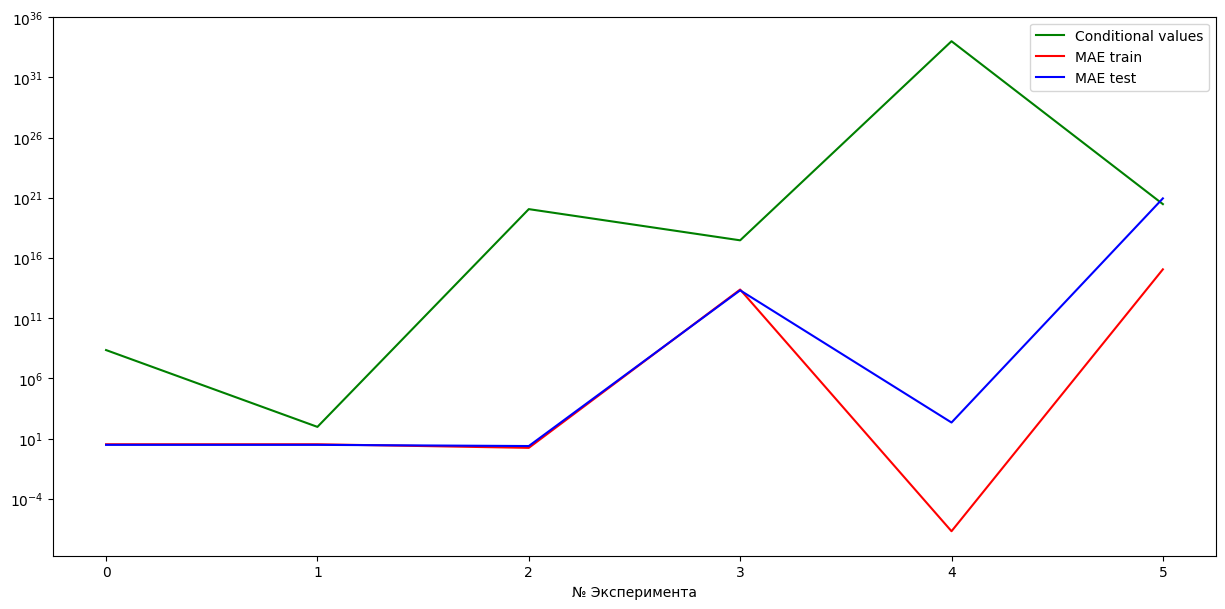

In [44]:
fig = plt.figure(figsize=(15,7))
plt.yscale('log')

conds = [cond for cond,_,_ in cond_train_test]
maes_train = [mae_train for _,mae_train,_ in cond_train_test]
maes_test = [mae_test for _,_,mae_test in cond_train_test]

plt.plot(np.arange(len(maes_train)), conds, color='g', label='Conditional values')
plt.plot(np.arange(len(maes_train)), maes_train, color='r', label='MAE train')
plt.plot(np.arange(len(maes_test)), maes_test, color='b', label='MAE test')

plt.legend()
plt.xlabel('№ Эксперимента')
plt.show()